In [2]:
import pandas as pd
import nltk
import typing
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Read in data here
location_name = "Palermo"
text_data = pd.read_excel(f'C:\\Users\\jackm\\Documents\\COVID-CrowdFight\\data\\200514 - Jack\\Translated-{location_name}.xlsx')
display(text_data.sample(5))

,Unnamed: 0,SearchKeywords,SearchCity,Time_Zone,tweet_ID,created_at,created_at_local,full_text,favorite_count,retweet_count,...,Geo,Coordinates,Checked_In_Place,User_Location,RT_id,RT_Geo,RT_Coordinates,RT_Place,RT_User_Location,translated_full_text
14039,14039,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.239500e+18,2020-03-16 10:31:28,2020-03-16 11:31:28,"RT @GDS_it: #Coronavirus, #Diodato in tv dedic...",0.0,1.0,...,NaN,NaN,None,NaN,1239475844218860032,NaN,NaN,NaN,Palermo,"RT @GDS_en: #Coronavirus, #Diodato on tv dedic..."
25327,25327,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.242368e+18,2020-03-24 08:31:06,2020-03-24 09:31:06,RT @e_terranova: In #Spagna hanno scoperto che...,0.0,480.0,...,NaN,NaN,None,"Roma, Lazio",1242368129273139968,NaN,NaN,NaN,Palermo,RT @e_terranova: In #Spain they discovered tha...
38933,38933,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.247923e+18,2020-04-08 16:22:29,2020-04-08 17:22:29,"Coronavirus, collaborazione medico scientifica...",0.0,0.0,...,NaN,NaN,None,Palermo,None,None,None,None,None,"Coronavirus, scientific medical collaboration ..."
32293,32293,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.244940e+18,2020-03-31 10:48:11,2020-03-31 11:48:11,"RT @GDS_it: #Coronavirus, avvocato giustifica ...",0.0,3.0,...,NaN,NaN,None,marsala,1244937986065789952,NaN,NaN,NaN,Palermo,"RT @GDS_en: #Coronavirus, lawyer justifies sup..."
3053,3053,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Palermo,1.0,1.236779e+18,2020-03-08 22:21:58,2020-03-08 23:21:58,"""bisogna farsi il segno della croce con l'acqu...",1.0,0.0,...,NaN,NaN,None,"Palermo, Sicilia",None,None,None,None,None,"""you have to make the sign of the cross with h..."


In [6]:
# Import english stop words

from nltk.corpus import stopwords
stopcorpus: typing.List = stopwords.words('english')
print(stopcorpus)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    import re
    return re.sub(r"http\S+", "", text)

text_data['translated_full_text'] = text_data['translated_full_text'].astype(str).apply(remove_links)

def style_text(text:str):
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    return [item for item in text_data if item not in list_of_words_to_remove]

text_data['cleaned_text'] = text_data['translated_full_text'].astype(str).apply(style_text)

text_data['cleaned_text'] = text_data['translated_full_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

def collapse_list_to_string(string_list):
    return ' '.join(string_list)

text_data['cleaned_text'] = text_data['cleaned_text'].apply(collapse_list_to_string)

display(text_data['cleaned_text'].head(5))

0    Coronavirus: Sonia, famous Chinese restaurant ...
1    @sarregoeswest @SpudFNVPN "More 73,300 infecte...
2    The Unknown Unknowns risk Coronavirus? Competi...
3    Coronavirus emergency. The mayor Modica taking...
4    @sarregoeswest @SpudFNVPN But know Shanghai re...
Name: cleaned_text, dtype: object

In [10]:
# Lemmatize cleaned text (stem words)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

text_data['clean_lemmatized'] = text_data['cleaned_text'].astype(str).apply(lemmatize_text)

text_data['clean_lemmatized'] = text_data['clean_lemmatized'].apply(collapse_list_to_string)

display(text_data['clean_lemmatized'].head(5))

0    Coronavirus: Sonia, famous Chinese restaurant ...
1    @sarregoeswest @SpudFNVPN "More 73,300 infecte...
2    The Unknown Unknowns risk Coronavirus? Competi...
3    Coronavirus emergency. The mayor Modica taking...
4    @sarregoeswest @SpudFNVPN But know Shanghai re...
Name: clean_lemmatized, dtype: object

In [12]:
output_df = pd.DataFrame(text_data[['full_text','clean_lemmatized','translated_full_text']].drop_duplicates())
display(output_df.head(5))

,full_text,clean_lemmatized,translated_full_text
0,"Coronavirus: chiude Sonia, il ristorante cines...","Coronavirus: Sonia, famous Chinese restaurant ...","Coronavirus: Sonia, the famous Chinese restaur..."
1,@sarregoeswest @SpudFNVPN https://t.co/DQorjEs...,"@sarregoeswest @SpudFNVPN ""More 73,300 infecte...","@sarregoeswest @SpudFNVPN ""More than 73,300 i..."
2,I Soliti Ignoti a rischio per il Coronavirus? ...,The Unknown Unknowns risk Coronavirus? Competi...,The Unknown Unknowns at risk for the Coronavir...
3,Emergenza Coronavirus. Il sindaco di Modica ad...,Coronavirus emergency. The mayor Modica taking...,Coronavirus emergency. The mayor of Modica is ...
4,@sarregoeswest @SpudFNVPN Ma che ne sai tu sei...,@sarregoeswest @SpudFNVPN But know Shanghai re...,@sarregoeswest @SpudFNVPN But what do you know...


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

In [16]:
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

In [18]:
# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
    df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))
    return df

output_df = get_sentiment_scores(output_df,'translated_full_text')
output_df = get_sentiment_scores(output_df,'clean_lemmatized')
display(output_df.head(5))

,full_text,clean_lemmatized,translated_full_text,translated_full_text Positive Sentiment Score,translated_full_text Negative Sentiment Score,translated_full_text Neutral Sentiment Score,translated_full_text Compound Sentiment Score,clean_lemmatized Positive Sentiment Score,clean_lemmatized Negative Sentiment Score,clean_lemmatized Neutral Sentiment Score,clean_lemmatized Compound Sentiment Score
0,"Coronavirus: chiude Sonia, il ristorante cines...","Coronavirus: Sonia, famous Chinese restaurant ...","Coronavirus: Sonia, the famous Chinese restaur...",0.0,0.000,1.000,0.0000,0.0,0.000,1.000,0.0000
1,@sarregoeswest @SpudFNVPN https://t.co/DQorjEs...,"@sarregoeswest @SpudFNVPN ""More 73,300 infecte...","@sarregoeswest @SpudFNVPN ""More than 73,300 i...",0.0,0.095,0.905,-0.5367,0.0,0.280,0.720,-0.8115
2,I Soliti Ignoti a rischio per il Coronavirus? ...,The Unknown Unknowns risk Coronavirus? Competi...,The Unknown Unknowns at risk for the Coronavir...,0.0,0.160,0.840,-0.2732,0.0,0.208,0.792,-0.2732
3,Emergenza Coronavirus. Il sindaco di Modica ad...,Coronavirus emergency. The mayor Modica taking...,Coronavirus emergency. The mayor of Modica is ...,0.0,0.206,0.794,-0.3818,0.0,0.245,0.755,-0.3818
4,@sarregoeswest @SpudFNVPN Ma che ne sai tu sei...,@sarregoeswest @SpudFNVPN But know Shanghai re...,@sarregoeswest @SpudFNVPN But what do you know...,0.0,0.065,0.935,-0.1531,0.0,0.110,0.890,-0.1531


In [20]:
output_df.to_excel(f'{location_name}-Sentiment-Analysis.xlsx')

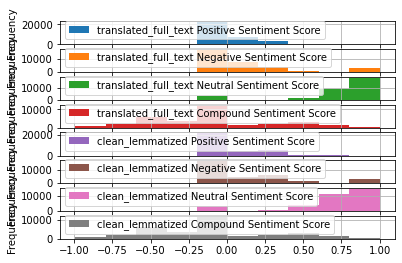

In [22]:
output_df.plot.hist(subplots=True,grid=True)
plt.tight_layout()
plt.savefig(f'{location_name}-sentiment-histograms.jpg')

0        coronavirus: sonia, famous chinese restaurant ...
1        @sarregoeswest @spudfnvpn 73,300 infected sars...
2        unknown unknowns risk coronavirus? competitors...
3        coronavirus emergency. mayor modica taking con...
4        @sarregoeswest @spudfnvpn know youve shanghai ...
                               ...                        
43035                                                     
43037                                                     
43038                                                     
43039                                                     
43043    empresario ma√±ana abre su empresa, tiene 30 e...
Name: wordcloud, Length: 33030, dtype: object

(-0.5, 399.5, 199.5, -0.5)

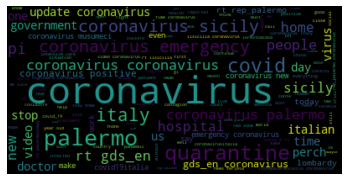

In [24]:
from wordcloud import WordCloud

exclude_words = ["http","https","error"]

exclude_wordWs.extend(stopcorpus)

output_df['wordcloud'] = output_df['translated_full_text'].astype(str).apply(remove_links)

output_df['wordcloud'] = output_df['wordcloud'].astype(str).apply(lambda x: x.lower())

def remove_apostrophes(text):
    text = text.replace("'", "")
    text = text.replace('"', "")E
    return text

output_df['wordcloud'] = output_df['wordcloud'].astype(str).apply(remove_apostrophes)

output_df['wordcloud'] = output_df['wordcloud'].astype(str).apply(lambda x: remove_words(x.split(),exclude_words))

output_df['wordcloud'] = output_df['wordcloud'].apply(lambda x: ' '.join(x))

display(output_df['wordcloud'])

wordcloud = WordCloud().generate(' '.join(output_df['wordcloud'].astype(str)))

wordcloud.to_file(f"{location_name}-wordcloud.png")

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")